## Analyzing Instagram Engagement Data for Social Media Strategies

### Goal of the Analysis

The primary goal of this analysis is to understand the engagement patterns and content performance of an Instagram influencer's account over a week. By analyzing various metrics such as likes, comments, content types, posting times, and caption content. The aim of teh analysis is to determine what drives user interaction and how different factors influence the success of posts.

### Objectives of the Analysis:

__1. Analyze Content Type Engagement__

* To determine how different types of content (videos and images) impact user engagement, specifically focusing on the average number of likes and comments each content type receives.

__2 Examine Caption Themes__

* Perform a text analysis on post captions to identify the most common words, themes, and sentiments that may contribute to higher engagement levels.

__3. Explore Engagement Relationships__

* To investigate the relationship between the number of likes and comments on posts, assessing whether higher likes correlate with more comments.

__4. Analyze Posting Patterns by Date and Time__

* To explore the frequency and distribution of posts across different days and hours, identifying peak times for posting and the associated engagement levels.

__5. Understand Engagement Variability by Time of Day__

* To analyze how engagement metrics such as likes and comments vary based on the time of day, identifying the optimal posting times for maximizing interaction.

__6. Identify Top 5 Best performing posts__

* To Identify Top 5 Best performing posts based on engagement (Likes + Comments)

__Description of each Column:__


| __Time__     |Description| 
|:----------|:----------|
| __Time__    | The date and time when the post was published.  | 
| __Content Type__   | Indicates whether the post is a video (GraphVideo) or an image (GraphImage)   |
| __Likes__   | The number of likes the post received.   |
| __Comments__    | The number of comments on the post.  | 
| __Caption__   | The text content of the post, which might include emojis, hashtags, and user mentions.   |
| __Post URL__    | A link to the post, although it might not be fully accessible as Instagram may block direct access from scripts.  | 
|__Hashtags__ | Any hashtags used in the post caption. This column shows NaN if no hashtags are found.   | 
| __Video Views__   | The number of views if the content type is a video. This column shows NaN for images.   | 

In [1]:
# Import all our necessray Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_excel('mazitundeednut_instagram_data.xlsx')

In [3]:
df.head()

,Time,Content Type,Likes,Comments,Caption,Post URL,Hashtags,Video Views
0,2024-08-06 20:43:57,GraphVideo,147691,4649,This peller and the robot girl relationship se...,https://instagram.flos5-1.fna.fbcdn.net/v/t51....,NaN,NaN
1,2024-08-06 19:54:03,GraphVideo,2276,129,Who is he sounding like? \nThis guy is good. W...,https://instagram.flos5-1.fna.fbcdn.net/v/t51....,NaN,NaN
2,2024-08-06 19:49:11,GraphVideo,97804,2615,DAY 6 PROTEST: 🤣🤣🤣🤣🤣 Awwwww! ❤️❤️❤️\n\nThank y...,https://instagram.flos5-3.fna.fbcdn.net/v/t51....,NaN,NaN
3,2024-08-06 19:34:38,GraphVideo,33891,1144,Oh Gosh! 🤣🤣🤣🤣🤣🤣\n\nNOTE: This page does not su...,https://instagram.flos5-3.fna.fbcdn.net/v/t51....,NaN,NaN
4,2024-08-06 19:32:34,GraphImage,16386,2426,Share your experience below….,https://instagram.flos5-1.fna.fbcdn.net/v/t51....,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          305 non-null    datetime64[ns]
 1   Content Type  305 non-null    object        
 2   Likes         305 non-null    int64         
 3   Comments      305 non-null    int64         
 4   Caption       305 non-null    object        
 5   Post URL      305 non-null    object        
 6   Hashtags      12 non-null     object        
 7   Video Views   0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 19.2+ KB


In [5]:
df.describe()

,Time,Likes,Comments,Video Views
count,305,305.000000,305.000000,0.0
mean,2024-08-04 02:14:04.842622720,52578.691803,3014.973770,NaN
min,2024-08-01 02:57:40,1467.000000,24.000000,NaN
25%,2024-08-02 12:08:28,24670.000000,884.000000,NaN
50%,2024-08-04 05:56:13,45284.000000,2229.000000,NaN
75%,2024-08-05 15:18:37,72645.000000,4040.000000,NaN
max,2024-08-06 20:43:57,214620.000000,19249.000000,NaN
std,NaN,37781.058793,3048.896171,NaN


### Data Cleaning

In [6]:
#Because of the high percentage of missing values we will remove this columns
df = df.drop(columns=['Video Views', 'Hashtags'])  # Dropping the 'Video Views' column

#Cleaning the content type column

df['Content Type'] = df['Content Type'].replace({
    'GraphVideo': 'Video',
    'GraphImage': 'Image',
    'GraphSidecar': 'Carousel'
})

In [7]:
# Extract date, time and hour components
df['Date'] = df['Time'].dt.date
df['Time of Day'] = df['Time'].dt.time
df['Hour'] = df['Time'].dt.hour

#Extract Day of the Week
df['Day of Week'] = df['Time'].dt.day_name()

## 1. Analyze Content Type Engagement

To determine how different types of content (videos and images) impact user engagement, specifically focusing on the average number of likes and comments each content type receives.

In [8]:
# Group by Content Type and calculate mean Likes and Comments
grouped_df = df.groupby('Content Type')[['Likes', 'Comments']].mean()

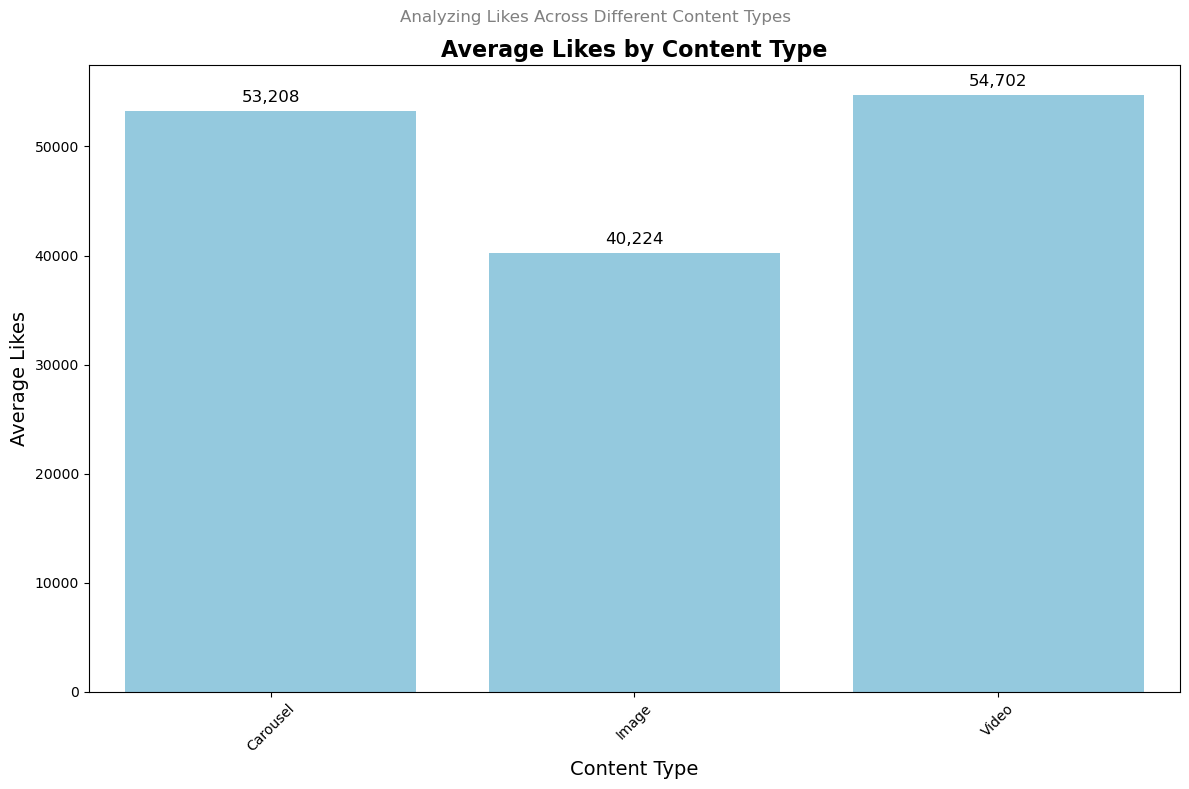

In [9]:

# Plot for Likes
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=grouped_df.reset_index(), x='Content Type', y='Likes', color='skyblue')

# Adding labels with commas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12, 
                color='black')

# Customizing the plot with titles and labels
plt.title('Average Likes by Content Type', fontsize=16, fontweight='bold')
plt.suptitle('Analyzing Likes Across Different Content Types', fontsize=12, color='gray')
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Average Likes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

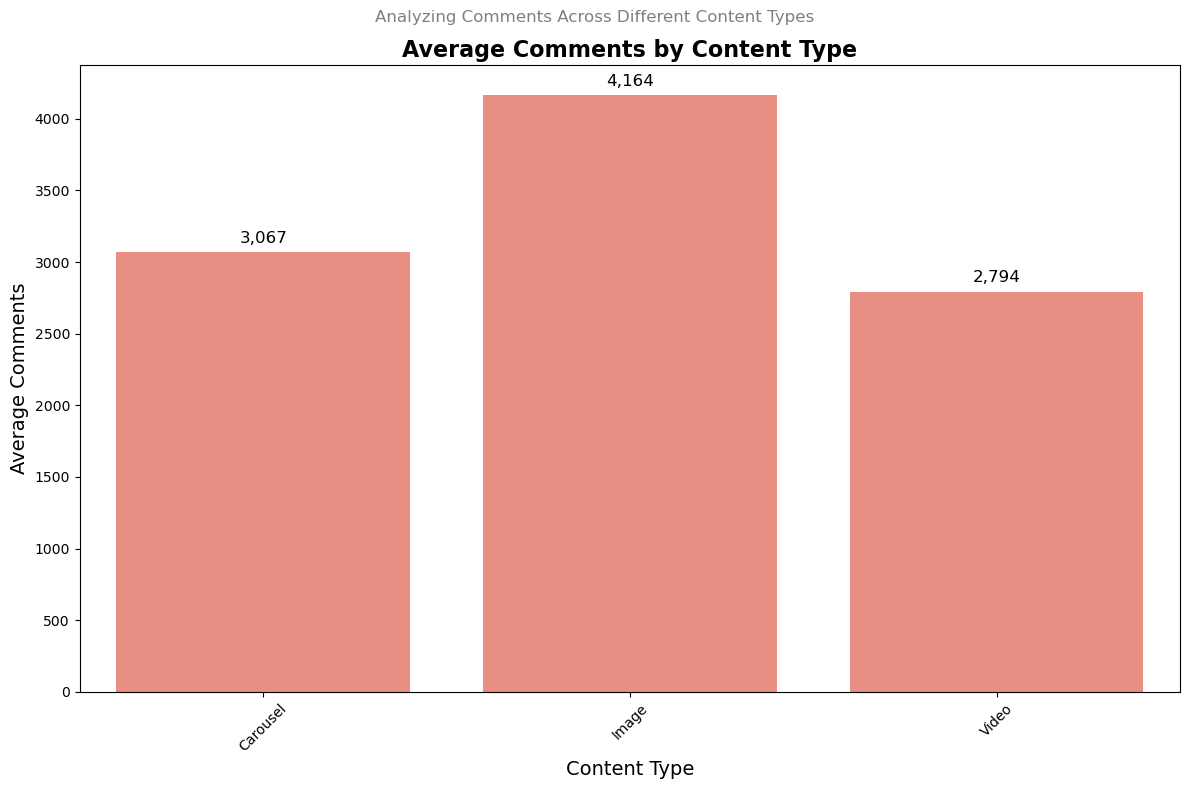

In [10]:
# Plot for Comments
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=grouped_df.reset_index(), x='Content Type', y='Comments', color='salmon')

# Adding labels with commas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12, 
                color='black')

# Customizing the plot with titles and labels
plt.title('Average Comments by Content Type', fontsize=16, fontweight='bold')
plt.suptitle('Analyzing Comments Across Different Content Types', fontsize=12, color='gray')
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Average Comments', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Likes
1. __Videos Lead in Likes:__ Videos are the most liked content type, averaging __54,702_ likes per post. This suggests that video content resonates strongly with the audience.

2. __Carousels Also Perform Well:__ Carousel posts, which combine multiple images or videos, come close to videos in popularity, averaging __53,208__ likes. T
his makes carousels a versatile and engaging format.

__Images Remain Valuable:__ Although not as popular as videos and carousels, images still receive a substantial number of likes, averaging __40,224__ per post. Images continue to be an effective content format, especially for those with limited resources for video creation.

#### Comments:
1. __Images Excel in Comments:__ When it comes to generating comments, images lead with an average of __4,164__ comments per post for that week. This indicates that image posts are particularly engaging and encourage more viewer interaction.

2. __All Content Types Spark Conversation:__ While images top the comments, carousel posts (3,067 comments) and videos (2,794 comments) also effectively engage audiences in discussions, showing that all three formats can drive meaningful interactions.

__Overall Summary:__

Videos and carousels are the most effective at driving likes, while images are particularly strong in generating comments. Each content type has its unique strengths in engaging the audience.

## 2 Examine Caption Themes

Perform a text analysis on post captions to identify the most common words, themes, and sentiments that may contribute to higher engagement levels.

In [11]:
all_captions = " ".join(df['Caption'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)

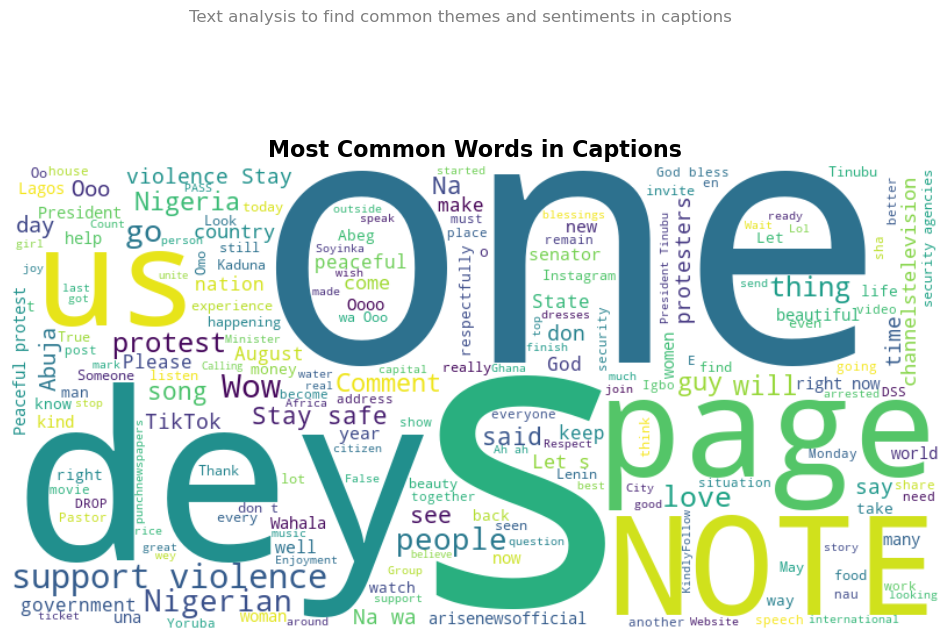

In [12]:
# Wordcloud for Caption Analysis
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Captions', fontsize=16, fontweight='bold')
plt.suptitle('Text analysis to find common themes and sentiments in captions', fontsize=12, color='gray')
plt.axis('off')
plt.show()

#### Politics and Governance
The wordcloud reveals that political discussions are a major focus, with words like __"President," "government," "nation," and "Tinubu"__ frequently appearing. This indicates that users are deeply engaged in conversations about governance and current events.

#### Social Issues Highlighted
Words such as "protest," "people," "violence," and "security" show that social issues, particularly those related to safety and justice, are significant topics of concern. These terms suggest that the public is actively discussing the challenges facing society.

#### Personal Stories and Emotions Shared

The presence of words like "love," "life," "experience," and "enjoyment" reflects that users are also sharing personal experiences and emotions, adding a human element to the discourse.

#### Common Sentiments:
__Concern and Frustration:__ Words like "violence," "protest," and "security" indicate a widespread concern and frustration with the current state of affairs, since this data was scraped during the protest month.

__Community and Unity:__ Terms like "people," "together," and "nation" suggest a strong sense of community and a collective desire for unity among Nigerians.

__Hope and Optimism:__ Despite the challenges, words like "love," "peace," and "hope" indicate that there is still a sense of optimism and belief in a better future.

__Overall Summary:__

The wordcloud captures the key themes and sentiments on Nigerian social media, emphasizing political issues, social concerns, and personal experiences.


### 3. Explore Engagement Relationships
To investigate the relationship between the number of likes and comments on posts, assessing whether higher likes correlate with more comments.

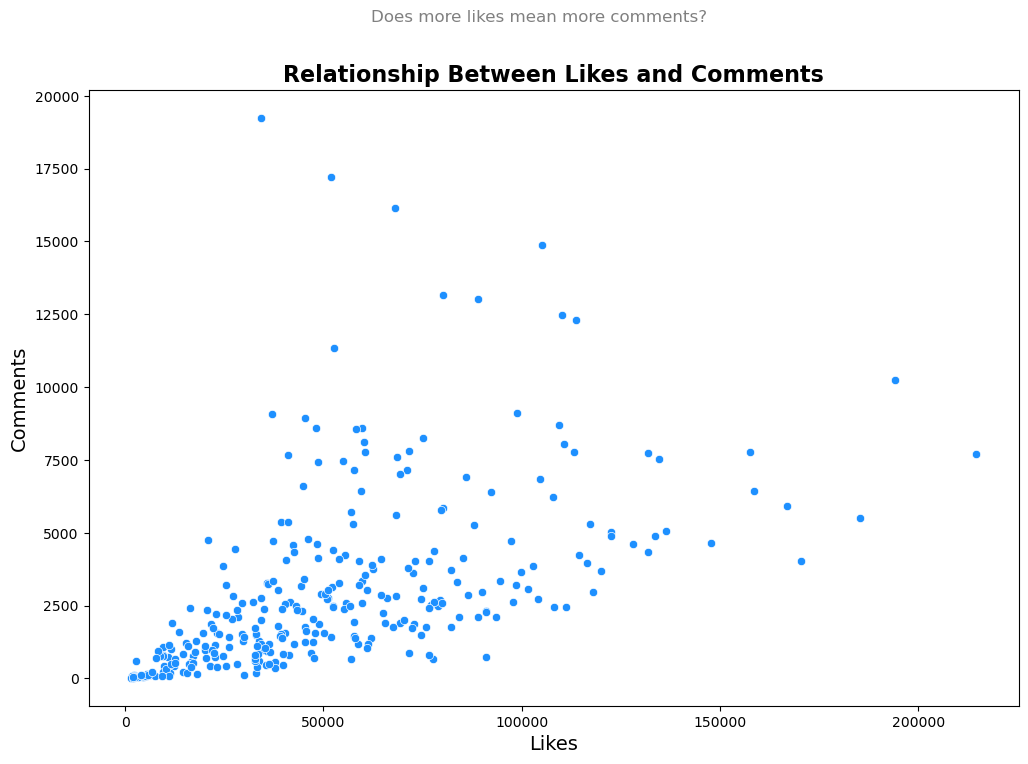

In [13]:
# Scatter plot for Engagement Analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Likes', y='Comments', color='dodgerblue')
plt.title('Relationship Between Likes and Comments', fontsize=16, fontweight='bold')
plt.suptitle('Does more likes mean more comments?', fontsize=12, color='gray')
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Comments', fontsize=14)
plt.show()


In [14]:
correlation = df['Likes'].corr(df['Comments'])

print(f"The correlation coefficient between Likes and Comments is: {correlation:.2f}")


The correlation coefficient between Likes and Comments is: 0.53


The analysis reveals a moderate positive correlation between likes and comments, meaning posts with more likes generally get more comments, but this isn't always the case. While most posts show typical engagement patterns, some outliers suggest that factors like content quality or timing also play a role. The correlation coefficient of 0.53 confirms that while likes often predict comment numbers, other elements significantly influence engagement

### 4. Analyze Posting Patterns by Date and Time

To explore the frequency and distribution of posts across different days and hours, identifying peak times for posting and the associated engagement levels.

__Posts by Hour of the Day__

<Axes: title={'center': 'Posts by Hour of Day'}, xlabel='Hour'>

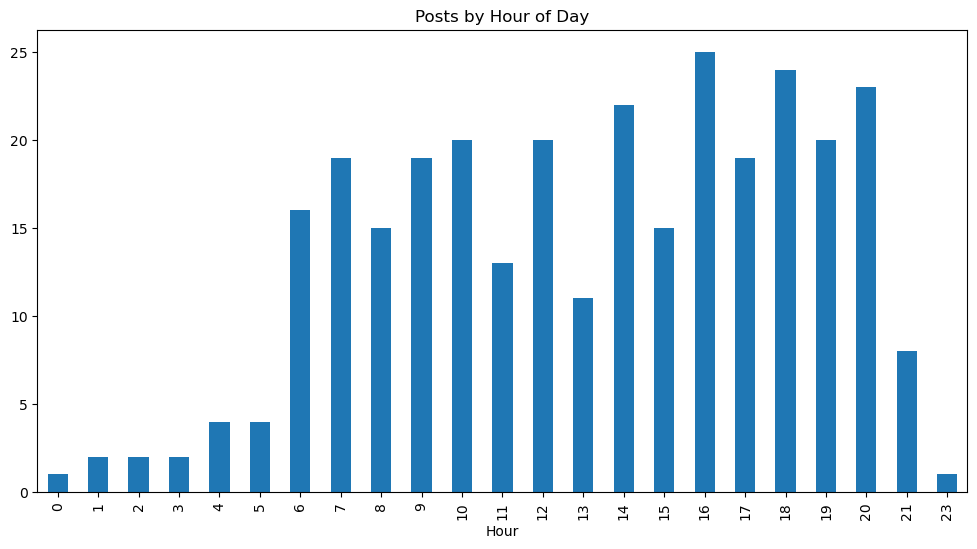

In [15]:
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title="Posts by Hour of Day")


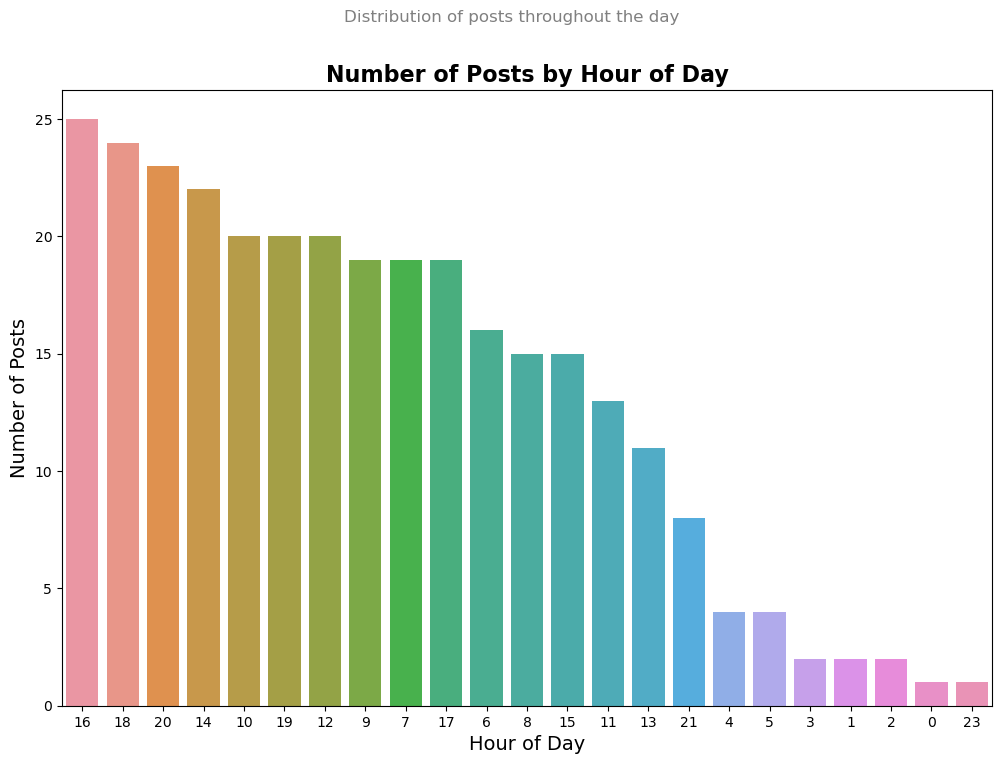

In [16]:
# Bar plot for Posts by Hour of the Day
plt.figure(figsize=(12, 8))
sns.countplot(x='Hour', data=df, order=df['Hour'].value_counts().index)
plt.title('Number of Posts by Hour of Day', fontsize=16, fontweight='bold')
plt.suptitle('Distribution of posts throughout the day', fontsize=12, color='gray')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.show()


__Posts by Day of the Week__


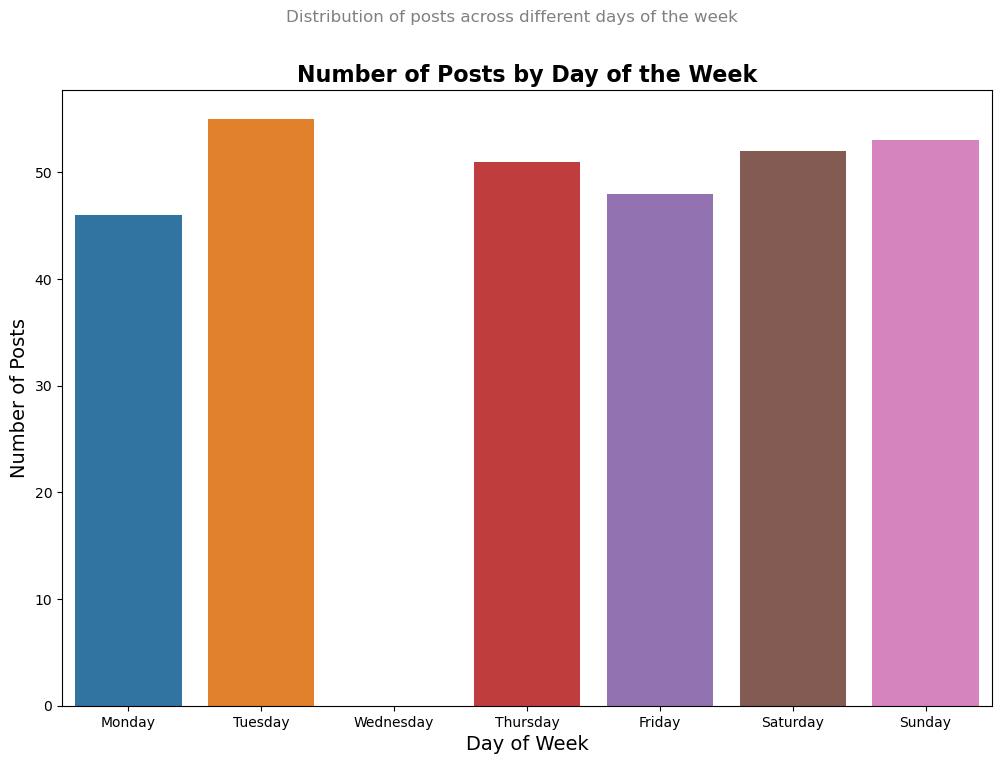

In [17]:
# Bar plot for Posts by Day of the Week
plt.figure(figsize=(12, 8))
sns.countplot(x='Day of Week', data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title('Number of Posts by Day of the Week', fontsize=16, fontweight='bold')
plt.suptitle('Distribution of posts across different days of the week', fontsize=12, color='gray')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.show()


The analysis of posting patterns reveals that this influencer is most active between 4 PM and 10 PM, with consistent activity throughout the evening and a noticeable drop after 10 PM. 
Daytime posting is less frequent, particularly between 12 AM and 4 PM. When looking at the days of the week, Tuesday stands out as the busiest day for posting. However, there is consistent activity throughout the week, including weekends, indicating steady engagement across all days.

### 5. Understand Engagement Variability by Time of Day

To analyze how engagement metrics such as likes and comments vary based on the time of day, identifying the optimal posting times for maximizing interaction.

__Likes by Hour of the Day__

Analyzing how Likes varies by Hour of the Day.

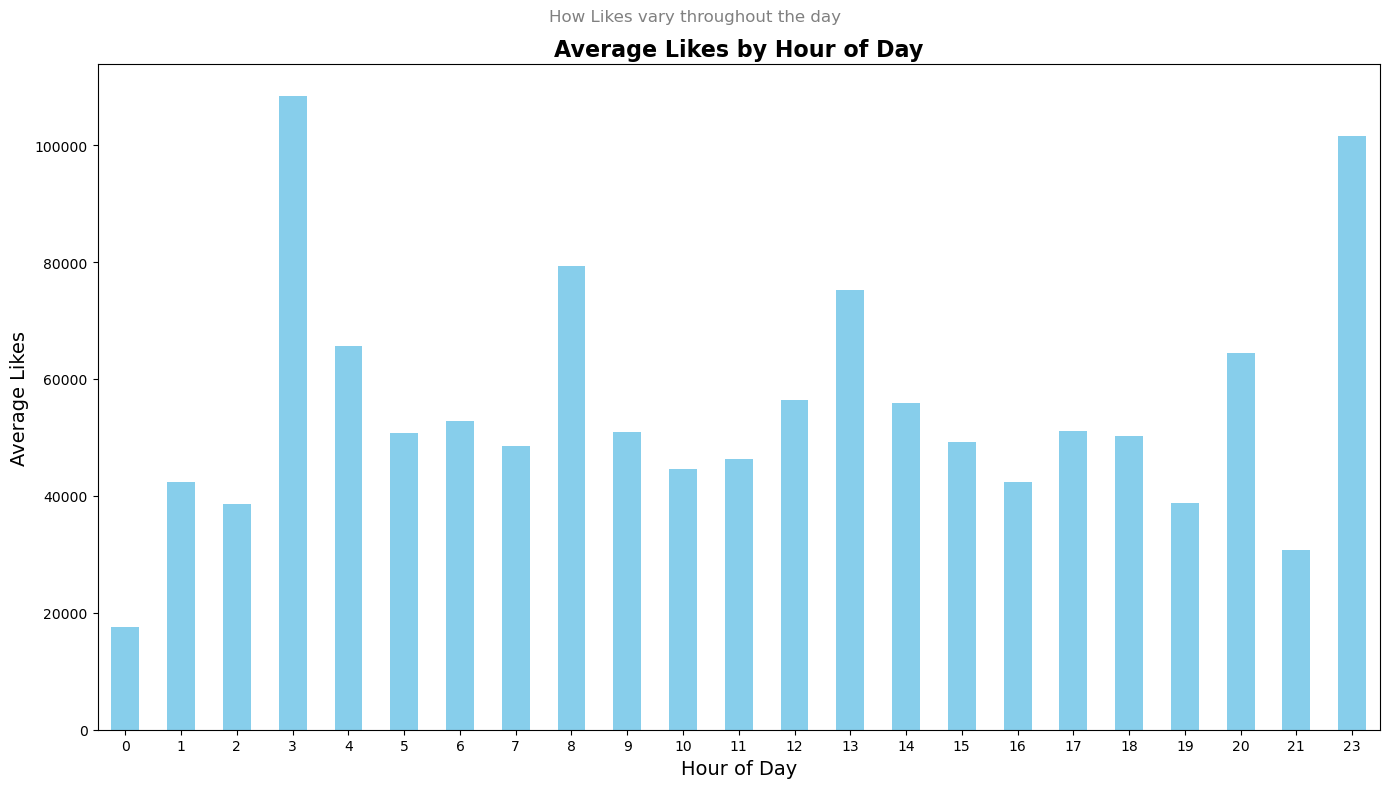

In [18]:
# Plot for Likes by Hour of the Day
plt.figure(figsize=(14, 8))
df.groupby('Hour')['Likes'].mean().plot(kind='bar', color='skyblue')

# Customizing the plot with titles and labels
plt.title('Average Likes by Hour of Day', fontsize=16, fontweight='bold')
plt.suptitle('How Likes vary throughout the day', fontsize=12, color='gray')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Likes', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

__Comments by Hour of the Day__

Analyzing how comments varies by Hour of the Day.

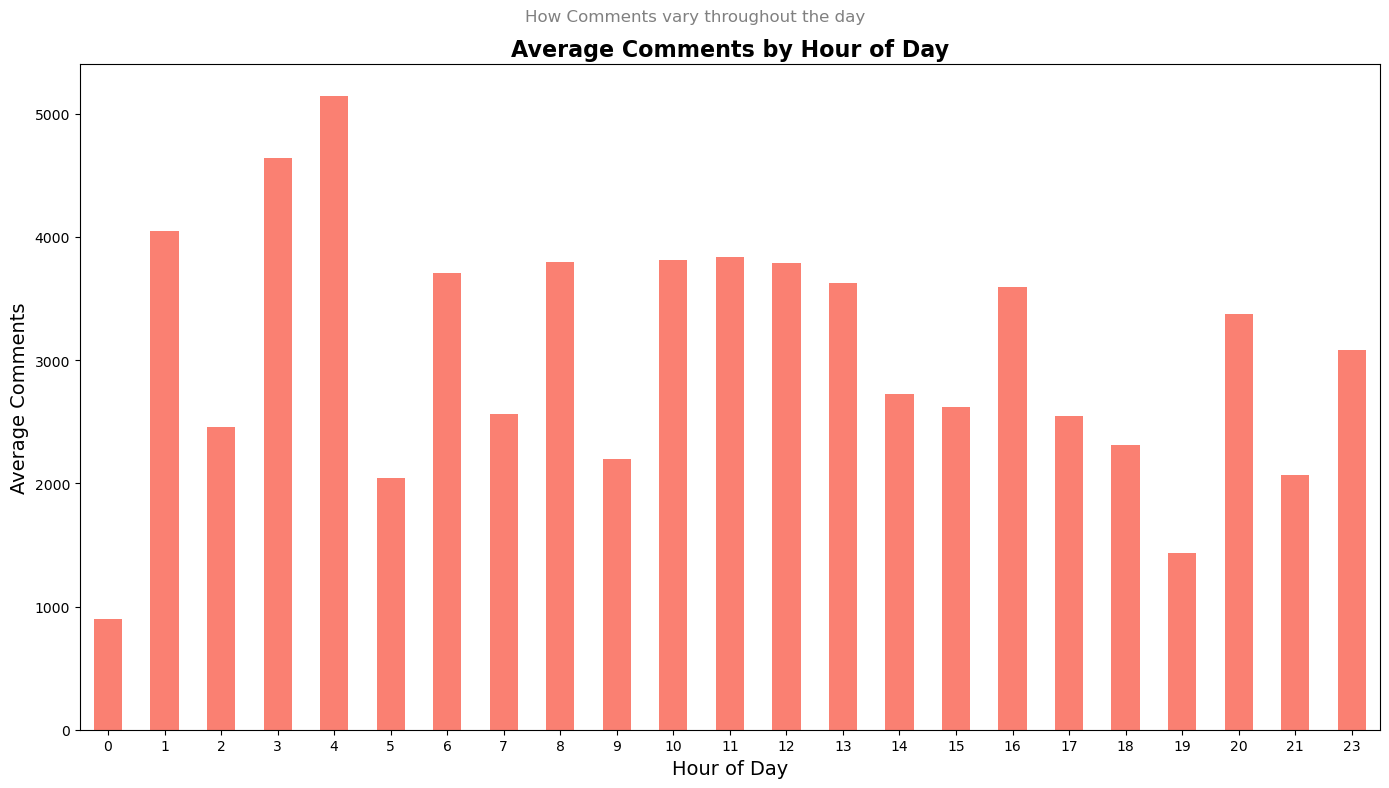

In [19]:
# Plot for Comments by Hour of the Day
plt.figure(figsize=(14, 8))
df.groupby('Hour')['Comments'].mean().plot(kind='bar', color='salmon')

# Customizing the plot with titles and labels
plt.title('Average Comments by Hour of Day', fontsize=16, fontweight='bold')
plt.suptitle('How Comments vary throughout the day', fontsize=12, color='gray')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Comments', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

__Engagement by Day of the Week__

Analyzing how engagement varies by the day of the week.

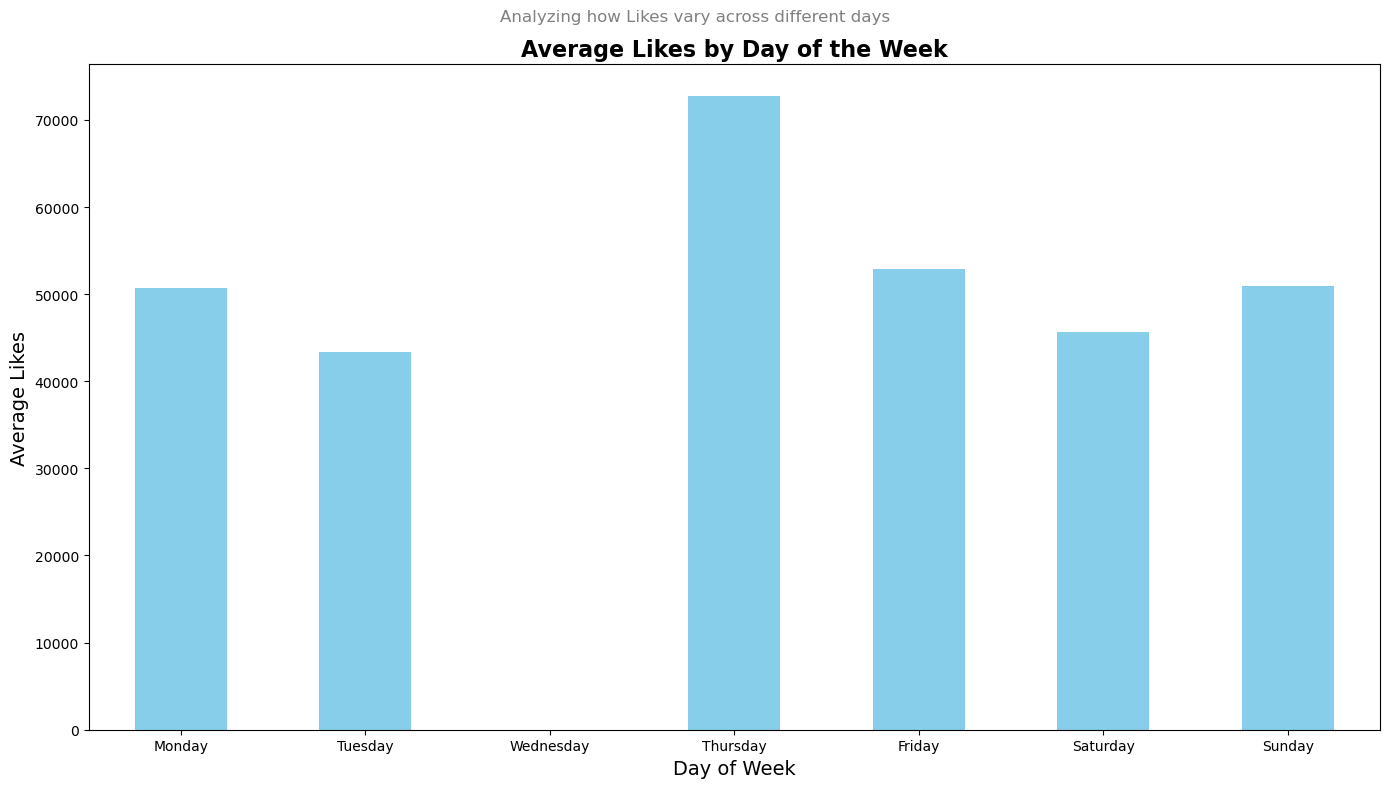

In [20]:
# Plot for Likes by Day of the Week
plt.figure(figsize=(14, 8))
df.groupby('Day of Week')['Likes'].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color='skyblue')

# Customizing the plot with titles and labels
plt.title('Average Likes by Day of the Week', fontsize=16, fontweight='bold')
plt.suptitle('Analyzing how Likes vary across different days', fontsize=12, color='gray')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Likes', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

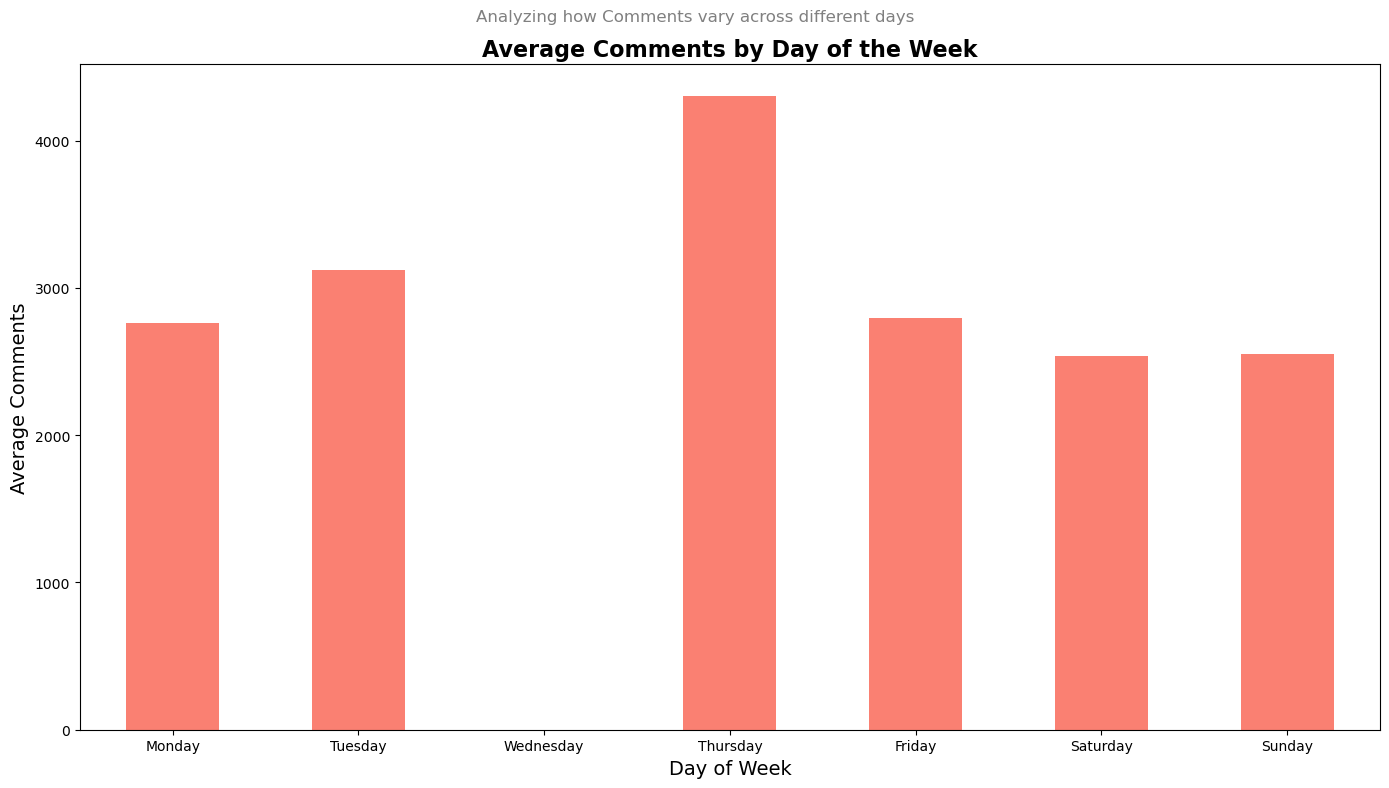

In [21]:
# Plot for Comments by Day of the Week
plt.figure(figsize=(14, 8))
df.groupby('Day of Week')['Comments'].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color='salmon')

# Customizing the plot with titles and labels
plt.title('Average Comments by Day of the Week', fontsize=16, fontweight='bold')
plt.suptitle('Analyzing how Comments vary across different days', fontsize=12, color='gray')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Comments', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The analysis of engagement variability by time of day reveals that certain hours are more effective for maximizing interaction on posts. The highest average likes occur around 3 AM and 11 PM, suggesting these times are optimal for posting if the goal is to boost likes. Conversely, 12 AM and 2 AM see the lowest likes, making them less ideal for engagement. Comments follow a similar trend, with peaks at 3 AM, 4 AM, and 10 AM, indicating these are the best times to generate discussion. In contrast, 12 AM and 2 AM again show lower engagement.


When examining engagement by day of the week, Thursday emerges as the most effective day for both likes and comments, making it a strategic day for posting. Monday and Friday also show good engagement, while Wednesday sees the lowest interaction. The weekend maintains consistent, albeit slightly lower, engagement. This suggests that while posting on Thursday can maximize engagement, the weekend still offers steady interaction opportunities.

### 6. Identify Top 5 Best performing posts

* To Identify Top 5 Best performing posts based on engagement (Likes + Comments)

In [22]:
# Calculate engagement as the sum of likes and comments
df['Engagement'] = df['Likes'] + df['Comments']

In [23]:
# Sort by engagement and get the top five posts
top_five_posts = df.sort_values(by='Engagement', ascending=False).head(5)

# Convert URLs to clickable links
top_five_posts['Post URL'] = top_five_posts['Post URL'].apply(lambda url: f'<a href="{url}" target="_blank">{url}</a>')

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


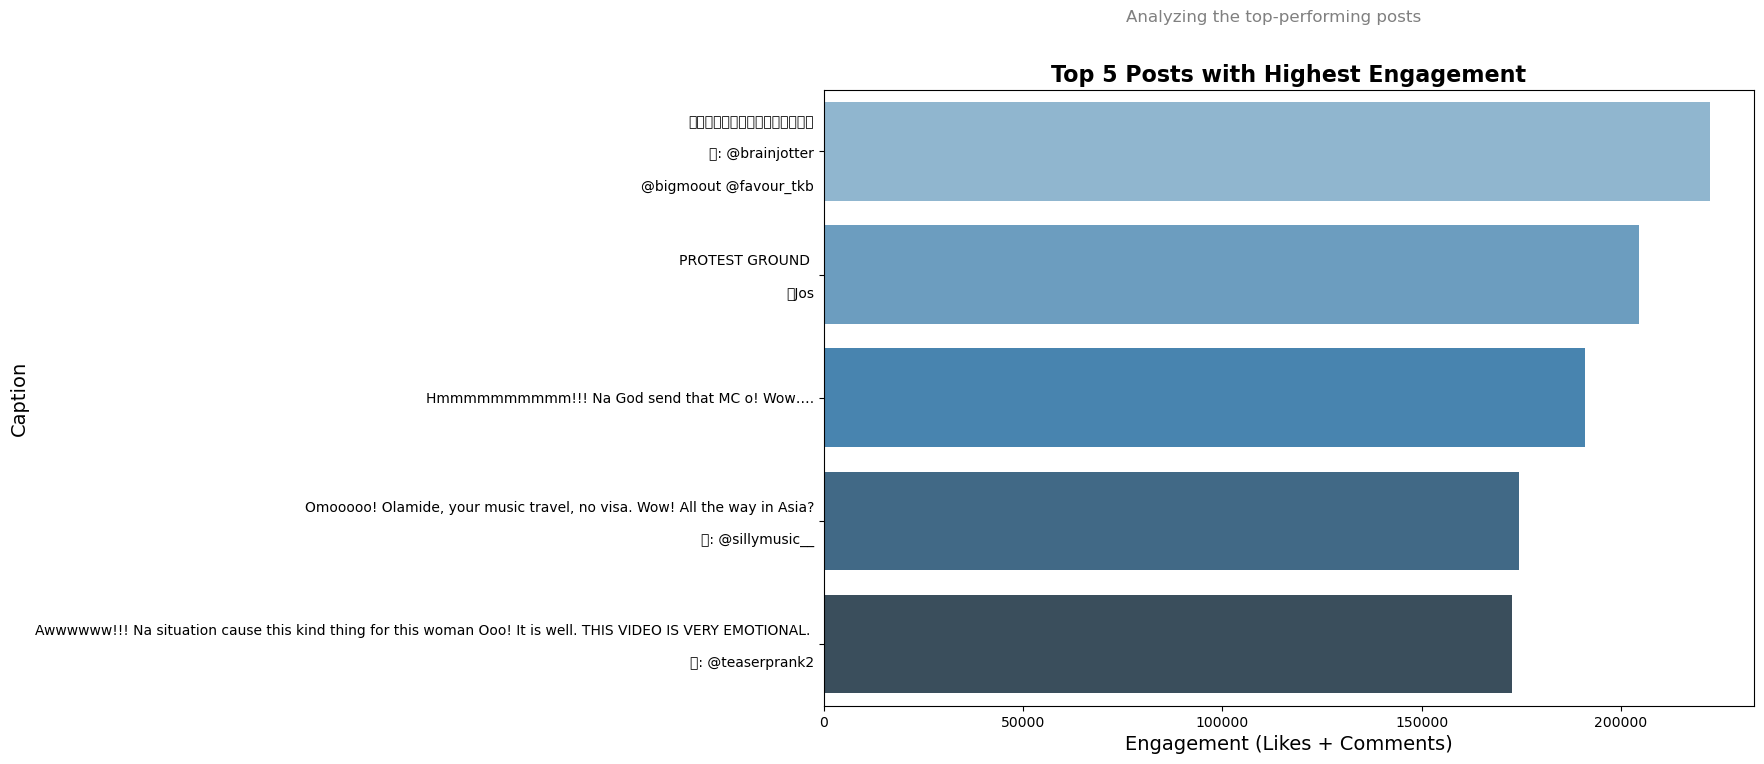

In [24]:
# Bar plot for Top 5 Posts with Highest Engagement
plt.figure(figsize=(12, 8))
sns.barplot(data=top_five_posts, x='Engagement', y='Caption', palette='Blues_d')
plt.title('Top 5 Posts with Highest Engagement', fontsize=16, fontweight='bold')
plt.suptitle('Analyzing the top-performing posts', fontsize=12, color='gray')
plt.xlabel('Engagement (Likes + Comments)', fontsize=14)
plt.ylabel('Caption', fontsize=14)
plt.show()


In [25]:
from IPython.core.display import display, HTML

# Display the top five posts with clickable links
display(HTML(top_five_posts[['Time', 'Content Type', 'Likes', 'Comments', 'Caption', 'Post URL', 'Engagement']].to_html(escape=False)))

C:\Users\user\AppData\Local\Temp\ipykernel_8040\310494316.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,Time,Content Type,Likes,Comments,Caption,Post URL,Engagement
141,2024-08-04 08:56:16,Carousel,214620,7709,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣\n\n📺: @brainjotter\n\n@bigmoout @favour_tkb,https://instagram.flos5-2.fna.fbcdn.net/v/t51.29350-15/453895110_2686688811497802_5484643255402672443_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.flos5-2.fna.fbcdn.net&_nc_cat=106&_nc_ohc=2xpYvKvgXiEQ7kNvgGfJvMo&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzQyNzA5NjYyNjkxNTI2OTE3Ng%3D%3D.2-ccb7-5&oh=00_AYCSGd3mo_D-9pLucjwFrb1xUUOAR2y4-OsgUxgd8YYVmQ&oe=66D3F772&_nc_sid=8f1549,222329
284,2024-08-01 12:54:01,Image,194218,10261,PROTEST GROUND \n\n📍Jos,https://instagram.flos5-3.fna.fbcdn.net/v/t51.29350-15/453592703_506722808410437_6783797477482579290_n.jpg?stp=dst-jpg_e35&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi4xNDQweDE0NDAuc2RyLmYyOTM1MC5kZWZhdWx0X2ltYWdlIn0&_nc_ht=instagram.flos5-3.fna.fbcdn.net&_nc_cat=109&_nc_ohc=rwOOWrtZ6QAQ7kNvgFKfh1P&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzQyNTA0MTk2NTk2NDkwNzI3OA%3D%3D.2-ccb7-5&oh=00_AYB0750aOFOP1b7HdrAyB9CYLOCaqSFNzA0td9BAN6DSzg&oe=66D3F031&_nc_sid=8f1549,204479
143,2024-08-04 08:29:33,Video,185394,5520,Hmmmmmmmmmm!!! Na God send that MC o! Wow….,https://instagram.flos5-2.fna.fbcdn.net/v/t51.29350-15/454258687_8452734468170346_1879464534908671982_n.jpg?stp=dst-jpg_e15&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi43MjB4NzIwLnNkci5mMjkzNTAuZGVmYXVsdF9jb3Zlcl9mcmFtZSJ9&_nc_ht=instagram.flos5-2.fna.fbcdn.net&_nc_cat=106&_nc_ohc=_1BAsFNqPeEQ7kNvgHxVZER&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzQyNzA4MjY3MTAzMTQ1MDkxNA%3D%3D.2-ccb7-5&oh=00_AYDtYZ45O5fpmUDLiR5r-02s2RizVeBL5LNu6RWbrE2LoA&oe=66D3EDB4&_nc_sid=8f1549,190914
202,2024-08-03 07:20:18,Video,170362,4022,"Omooooo! Olamide, your music travel, no visa. Wow! All the way in Asia?\n\n📺: @sillymusic__",https://instagram.flos5-1.fna.fbcdn.net/v/t51.29350-15/453924205_512517754630993_3431942258487936278_n.jpg?stp=dst-jpg_e15&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi43MjB4NzIwLnNkci5mMjkzNTAuZGVmYXVsdF9jb3Zlcl9mcmFtZSJ9&_nc_ht=instagram.flos5-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=WHTXIcu1uAgQ7kNvgG6UdL-&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzQyNjMyMzA4ODcwMDg0MjM3OA%3D%3D.2-ccb7-5&oh=00_AYB9eSkrBpST-esY35-X2lw0yTzLUGp2Efl_lRCcVuDcqw&oe=66D3EF8E&_nc_sid=8f1549,174384
226,2024-08-02 13:12:37,Video,166858,5916,Awwwwww!!! Na situation cause this kind thing for this woman Ooo! It is well. THIS VIDEO IS VERY EMOTIONAL. \n\n📺: @teaserprank2,https://instagram.flos5-2.fna.fbcdn.net/v/t51.29350-15/453561091_505163598595668_453718756754425533_n.jpg?stp=dst-jpg_e15&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi43MjB4MTI4MC5zZHIuZjI5MzUwLmRlZmF1bHRfY292ZXJfZnJhbWUifQ&_nc_ht=instagram.flos5-2.fna.fbcdn.net&_nc_cat=100&_nc_ohc=M_oPfGs6QEEQ7kNvgFcMkNk&edm=AEhyXUkBAAAA&ccb=7-5&ig_cache_key=MzQyNTc3NDkyMjQzNDUyMzY2MQ%3D%3D.2-ccb7-5&oh=00_AYDgFXwwesod3vpLzOAJoDrVMp2ADFmg2cUcHpW4qks8jA&oe=66D3F4C5&_nc_sid=8f1549,172774


The analysis of the top 5 best-performing posts reveals which content resonates most with the audience, based on the combined number of likes and comments. The top post stands out significantly, with over 15,000 engagements, highlighting its popularity. 

The remaining four posts show a range of engagement levels, from about 2,500 to just over 10,000 interactions. This insight is valuable for identifying the types of content that drive the most engagement, helping to inform future content strategies aimed at maximizing audience interaction.

## Recommendations
Based on this particular week analysis, here are key recommendations for optimizing social media content strategy:


* __Focus on Videos and Carousels:__ These formats receive the highest engagement. Prioritize them in your content strategy.

* __Post in the Evening:__ Schedule posts between 4 PM and 10 PM for peak engagement.

* __Optimize for Thursdays:__ Aim to publish your best content on Thursdays, as it shows the highest average likes and comments.

* __Adjust Based on Performance:__ Regularly review engagement metrics and adapt your strategy based on what content performs best.

### Suggestions for Further Analysis

__1. Trend Analysis Over Time:__ Examine how engagement metrics evolve over a longer period. Collect data over multiple weeks or months to identify long-term trends and patterns in engagement, content performance, and follower growth

__2. Sentiment Analysis of Comments:__ If possible analyze the sentiment of comments to gauge audience reactions more deeply. You can use sentiment analysis tools to classify comments into positive, negative, and neutral categories, and correlate these sentiments with engagement metrics.

__3. Competitor Analysis:__ Compare the influencer's engagement metrics with those of competitors by collecting and analyzing engagement data from similar influencers or competitors to benchmark performance and identify opportunities for improvement.

### Conclusion

For data analysts, this project is an excellent showcase of technical and analytical skills. By scraping data from Instagram, it demonstrates proficiency in data collection, web scraping, and preprocessing. The analysis of content engagement, posting patterns, and top-performing posts not only highlights the ability to manage and interpret large datasets but also emphasizes the capacity to generate actionable insights from complex information. This project is a robust portfolio piece, reflecting technical expertise in data gathering and analytical skills in trend identification and insight generation.

For business owners, the project's focus on optimizing content strategy through data-driven insights offers practical advantages. It assists in making informed decisions based on real engagement metrics, improving content effectiveness and strategic planning.

For aspiring influencers, this analysis is particularly valuable. By understanding which types of content drive the most engagement, optimal posting times, and the characteristics of successful posts, influencers can tailor their strategies to boost their visibility and interaction on social media. This data-driven approach helps in crafting content that resonates with the audience, maximizing engagement, and building a stronger online presence.
